In [1]:
import pandas as pd
import numpy as np
import helper
import missingno as msno



## load all variables

In [2]:
## load target
main_frame = pd.read_csv('cleaned_data/long_interpolated_target.csv', index_col=0, parse_dates=['Time'])

In [3]:
## weather
weather = pd.read_csv('cleaned_data/weather.csv', index_col=0, parse_dates=['date_time'])
weather.rename(columns={"date_time":"Time", "zip":"zip_code"}, inplace=True)

## Environmental Violations
env_viol = pd.read_csv('cleaned_data/env_violation.csv', index_col=0, parse_dates=['date'])
env_viol.rename(columns={"date":"Time", "zip":"zip_code"}, inplace=True)

## Daycare
daycare = pd.read_csv('cleaned_data/daycare.csv', index_col=0, parse_dates=['date'])
daycare.rename(columns={"date":"Time", "zip":"zip_code"}, inplace=True)

## key_econ
econ = pd.read_csv('cleaned_data/key_econ.csv', index_col=1, parse_dates= {'Time':['Month', 'Year']})

## City unemployment
city_unemp = pd.read_csv('cleaned_data/city_unemployment_rates.csv', index_col=0, parse_dates= ['Time'])

## Monthly gas prices
gas_prices = pd.read_csv('cleaned_data/monthly_avg_gas_prices.csv', index_col=0, parse_dates= ['Time'])

## Monthly TNX
monthly_tnx = pd.read_csv('cleaned_data/monthly_tnx.csv', index_col=0, parse_dates= ['Time'])

## polling
polling = pd.read_csv('cleaned_data/poll_clean.csv', index_col=0, parse_dates=['Time'])

## Covid
covid = pd.read_csv('cleaned_data/covid_clean.csv', index_col=0, parse_dates=['Time'])

## new_biz_frames
new_biz_ins = pd.read_csv('cleaned_data/new_biz_outlet_inside.csv', index_col=1, parse_dates= {'Time':['month', 'year']})
new_biz_out = pd.read_csv('cleaned_data/new_biz_outlet.csv', index_col=1, parse_dates= {'Time':['month', 'year']})
new_biz_tax = pd.read_csv('cleaned_data/new_biz_taxpayer.csv', index_col=1, parse_dates= {'Time':['month', 'year']})

## liquor permit
liquor = pd.read_csv('cleaned_data/liquor_permit.csv', index_col=0, parse_dates= ['date'])
liquor.rename(columns={"date":"Time", "zip":"zip_code"}, inplace=True)


## Sales tax allocation
sales_tax = pd.read_csv('cleaned_data/sales_tax_allocation.csv', index_col=1, parse_dates= {'Time':['month', 'year']})

## sap_case_shiller
sap = pd.read_csv('cleaned_data/sap_case_shiller.csv', index_col=0, parse_dates= ['Time'])

In [23]:
## Get list of feature files
feature_frames = [weather, 
                   env_viol, 
                   daycare, 
                   econ, 
                   city_unemp, 
                   gas_prices, 
                   monthly_tnx, 
                   polling, 
                   covid, 
                   new_biz_ins,
                   new_biz_out, 
                   new_biz_tax, 
                   liquor, 
                   sales_tax, 
                   sap]
feature_frames_name = ['weather', 
                   'env_viol', 
                   'daycare', 
                   'econ', 
                   'city_unemp', 
                   'gas_prices', 
                   'monthly_tnx', 
                   'polling', 
                   'covid', 
                   'new_biz_ins',
                   'new_biz_out', 
                   'new_biz_tax', 
                   'liquor', 
                   'sales_tax', 
                   'sap']

## look at time ranges

In [24]:
for idx, frame in enumerate(feature_frames):
    date_range = str(frame['Time'].dt.date.min()) + ' to ' +str(frame['Time'].dt.date.max())
    print(f'{feature_frames_name[idx]}: {date_range}')

weather: 2012-01-01 to 2021-08-01
env_viol: 2012-01-01 to 2021-08-01
daycare: 2012-01-01 to 2021-09-01
econ: 2012-01-01 to 2021-11-01
city_unemp: 2011-07-01 to 2021-07-01
gas_prices: 2000-06-01 to 2021-08-01
monthly_tnx: 2010-01-01 to 2021-08-01
polling: 2011-02-01 to 2021-07-01
covid: 2012-01-01 to 2021-08-01
new_biz_ins: 2012-01-01 to 2021-12-01
new_biz_out: 2012-01-01 to 2021-12-01
new_biz_tax: 2012-01-01 to 2021-12-01
liquor: 2012-01-01 to 2021-08-01
sales_tax: 2013-01-01 to 2021-09-01
sap: 2011-06-01 to 2021-06-01


## look at missing values in each

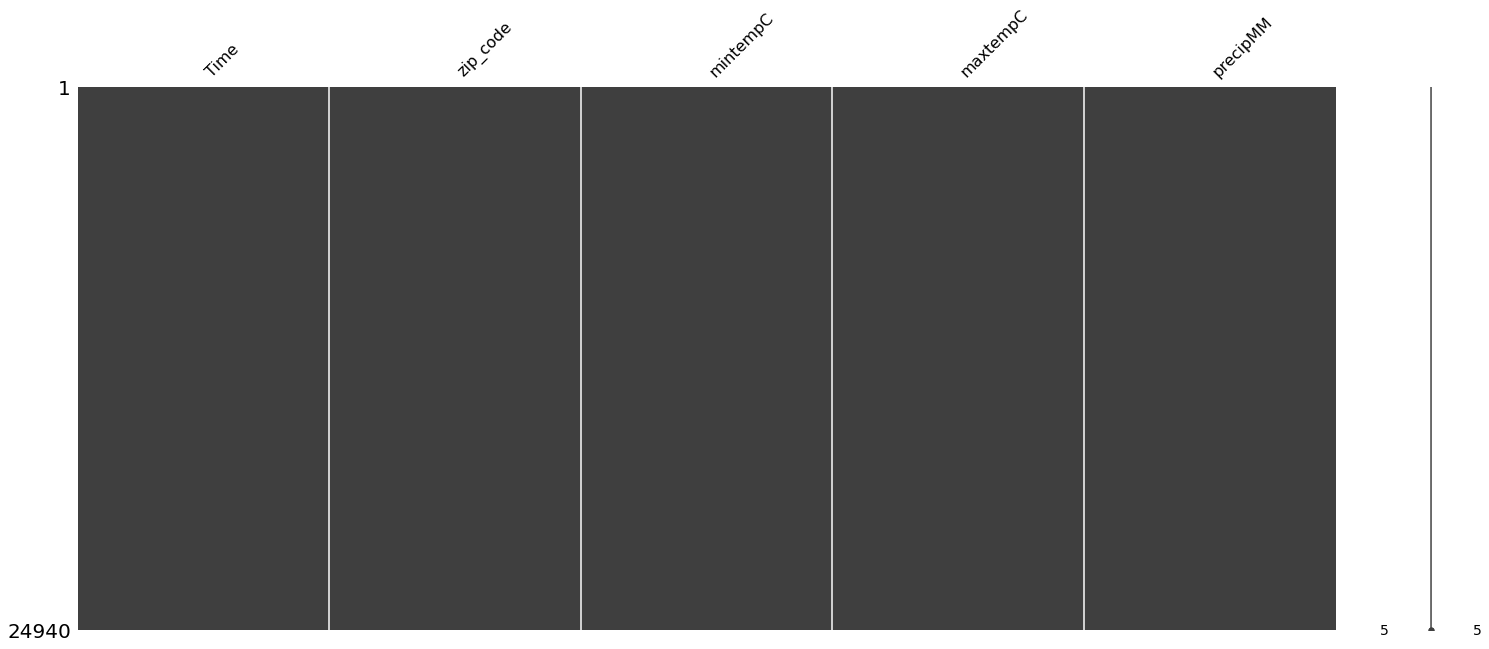

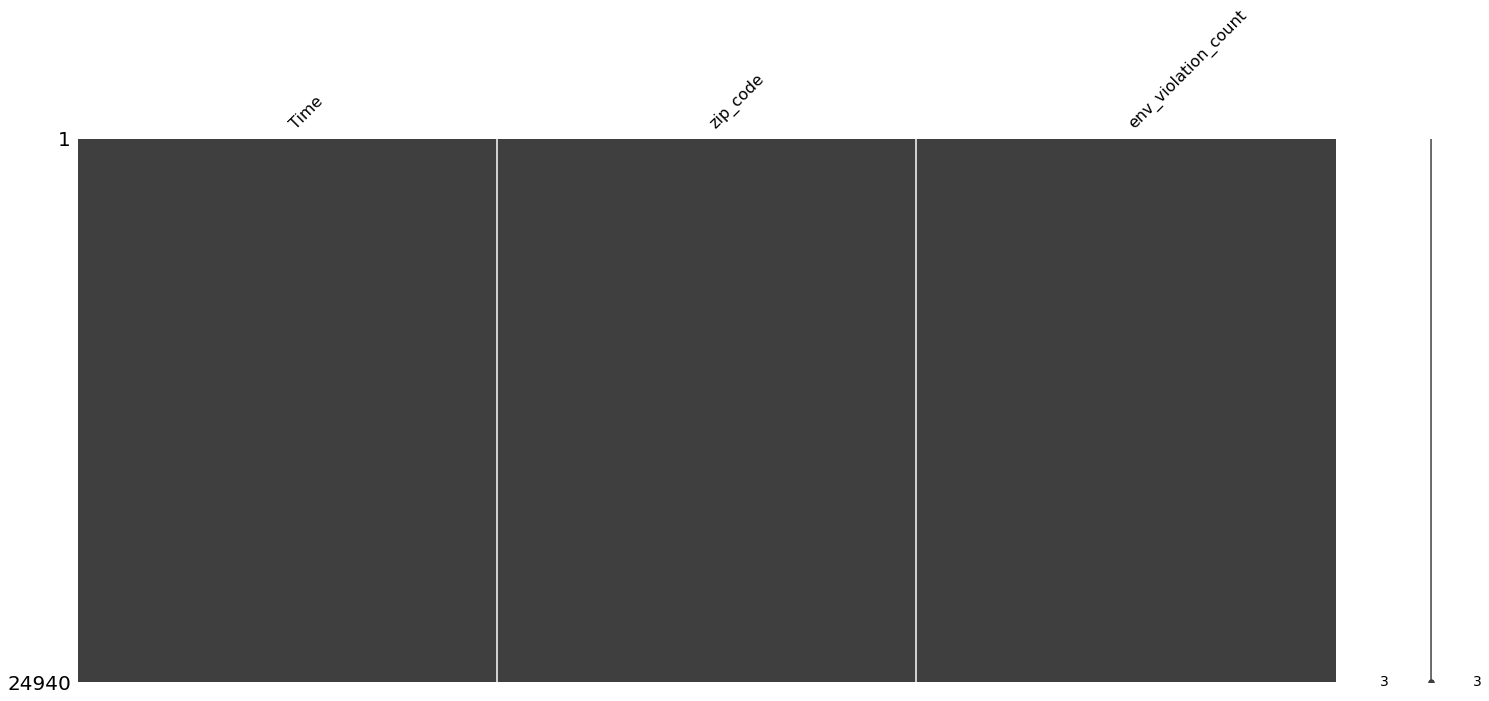

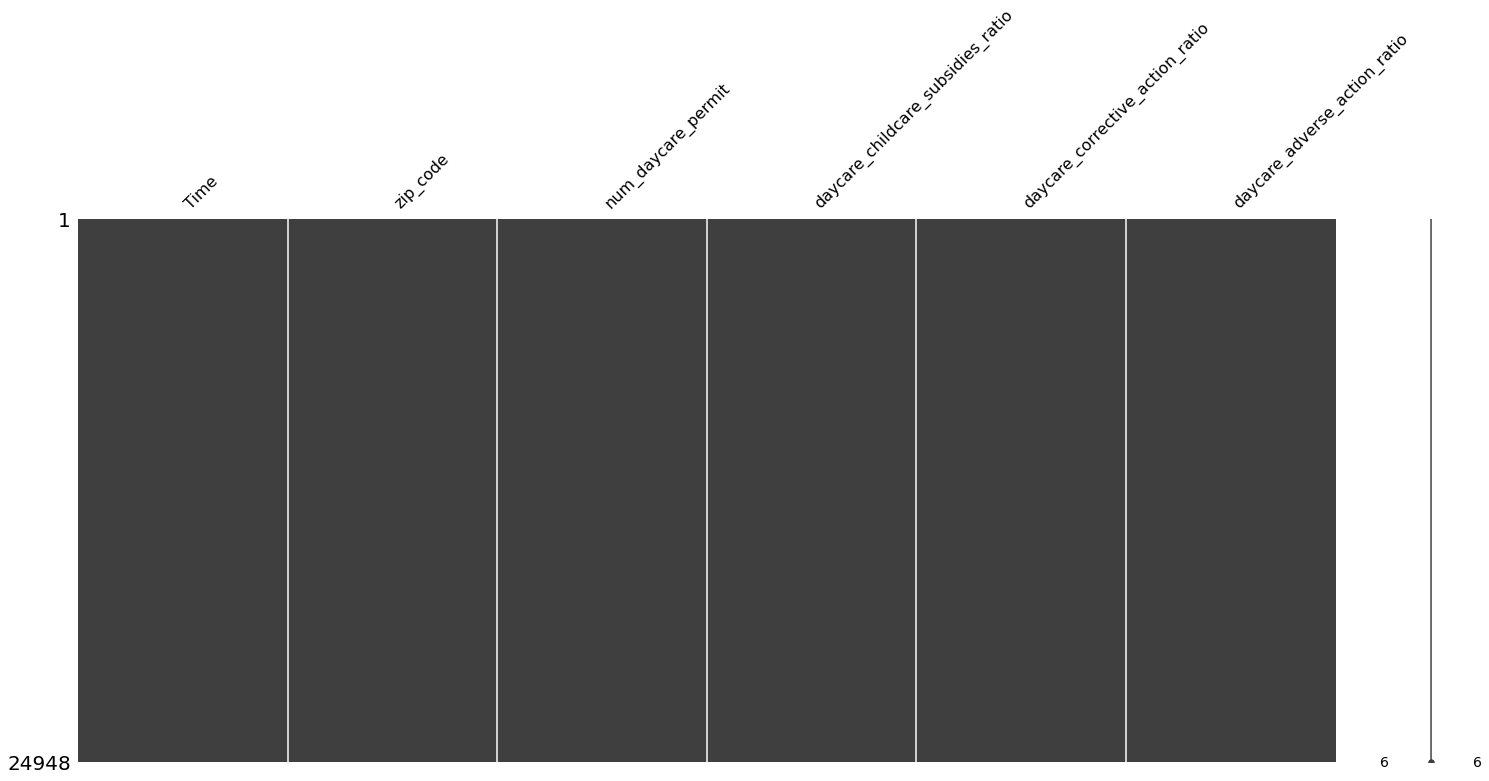

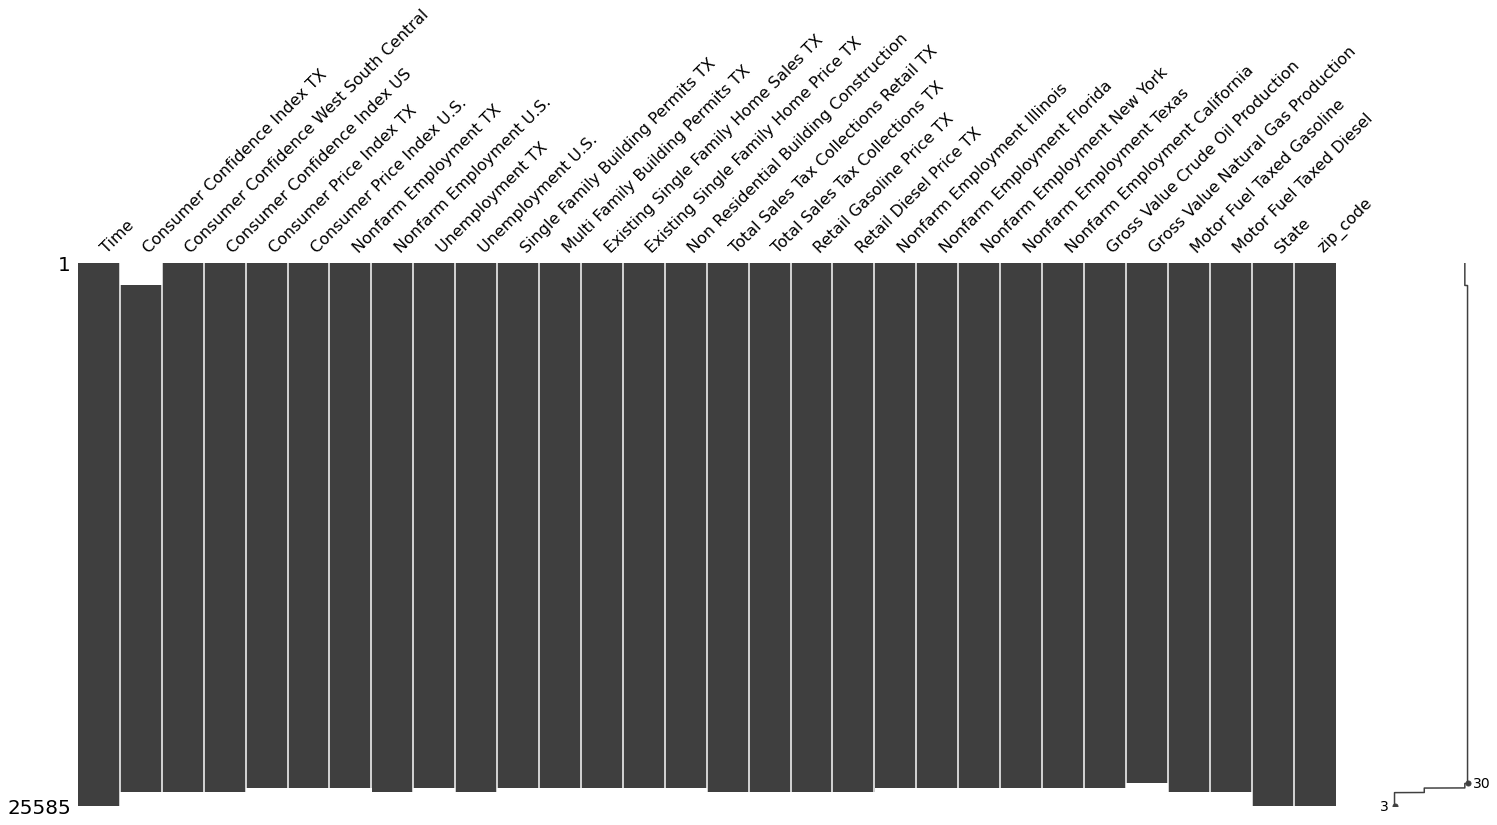

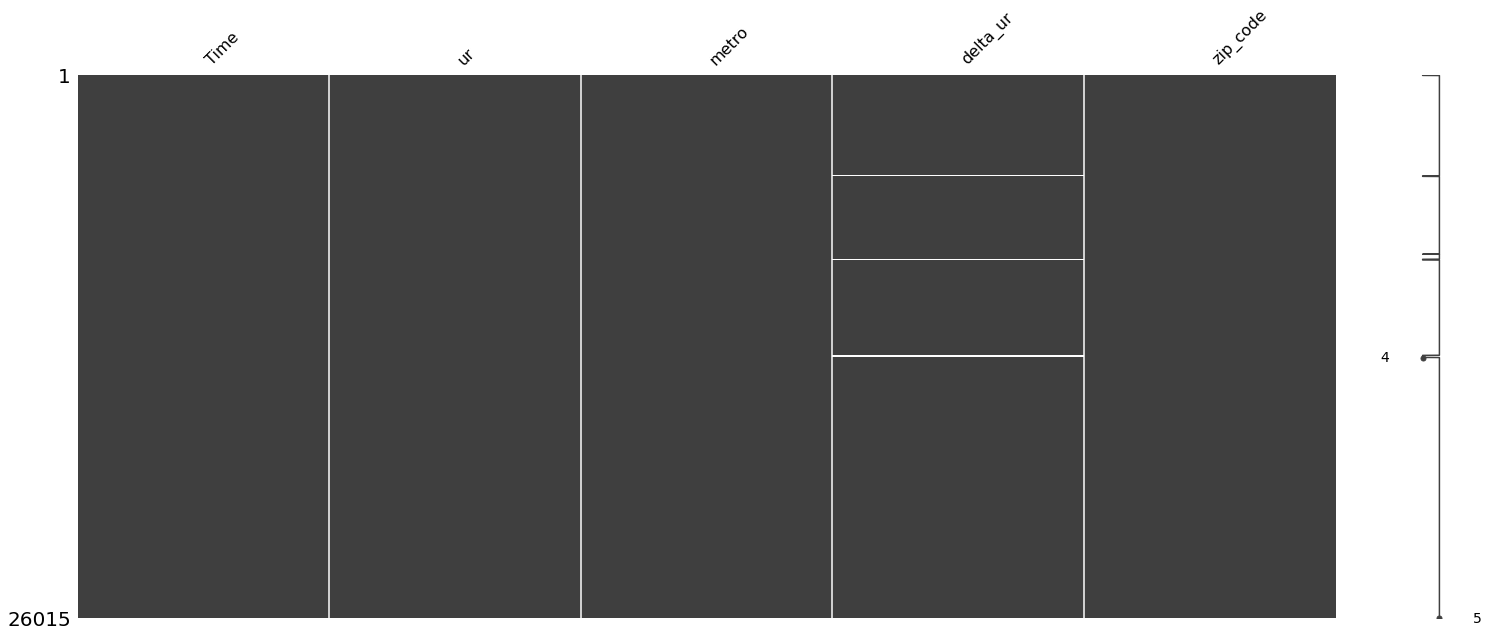

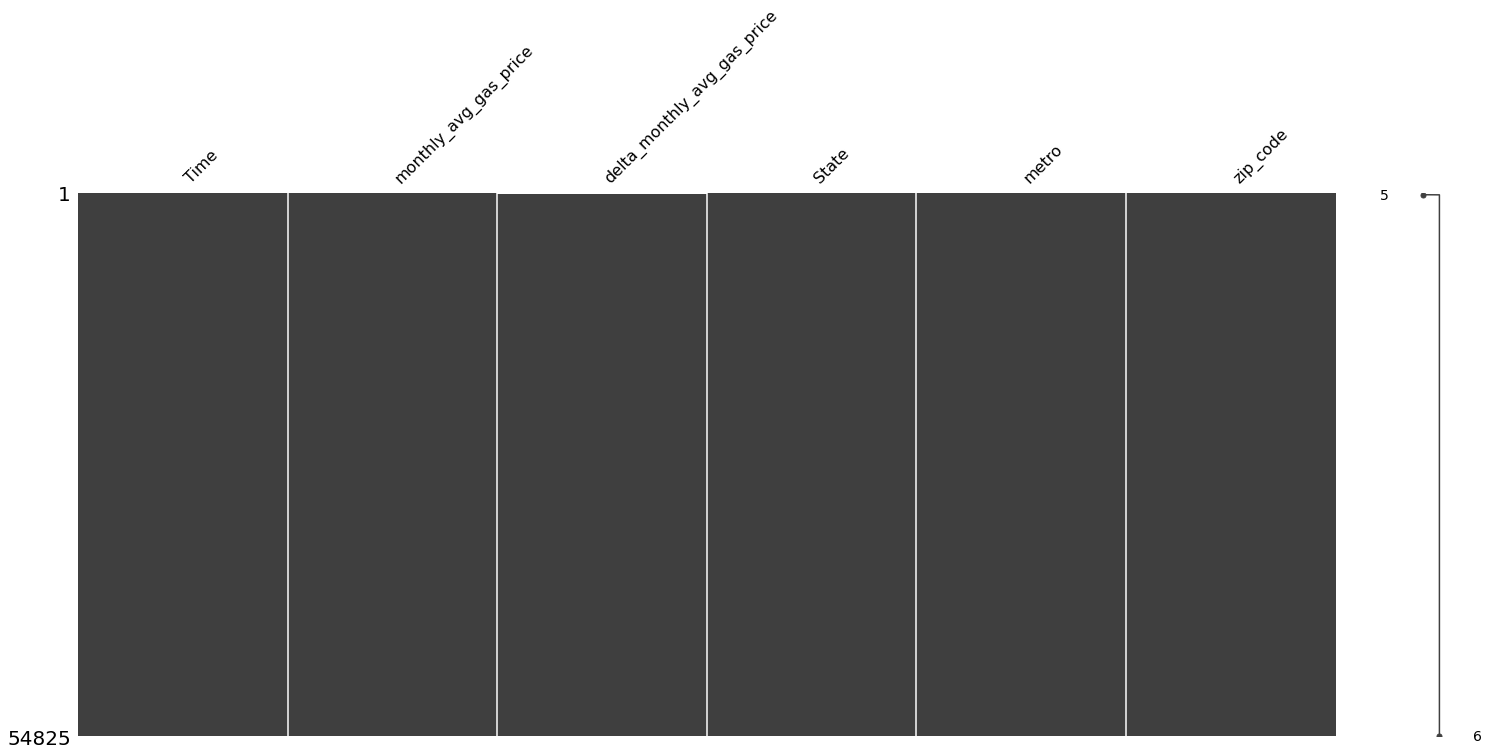

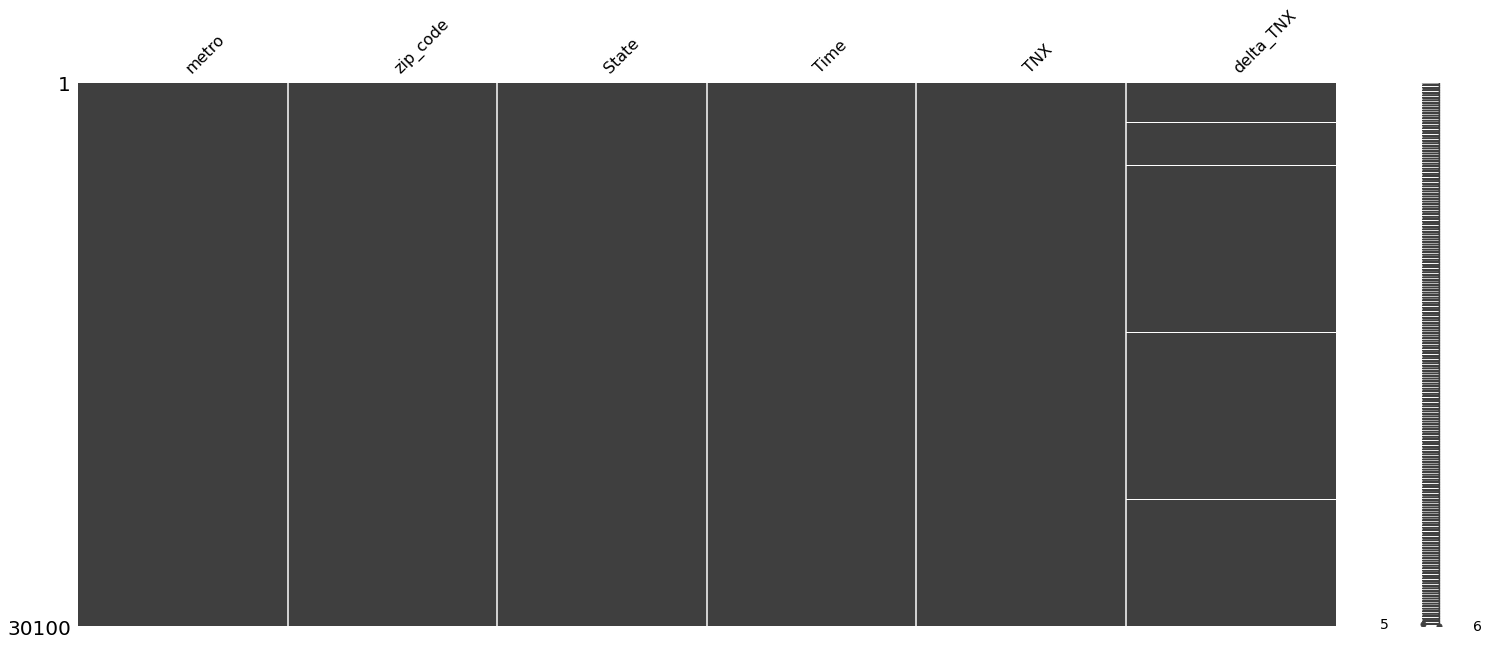

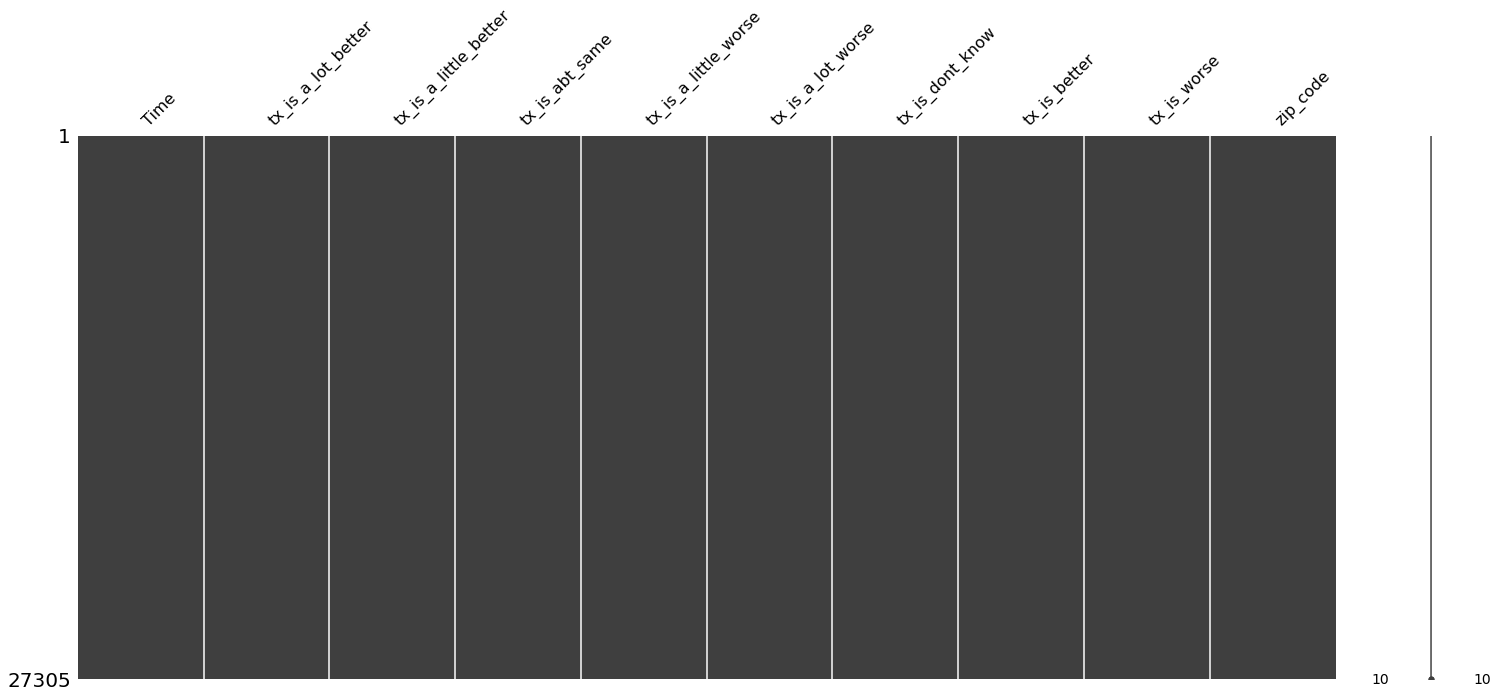

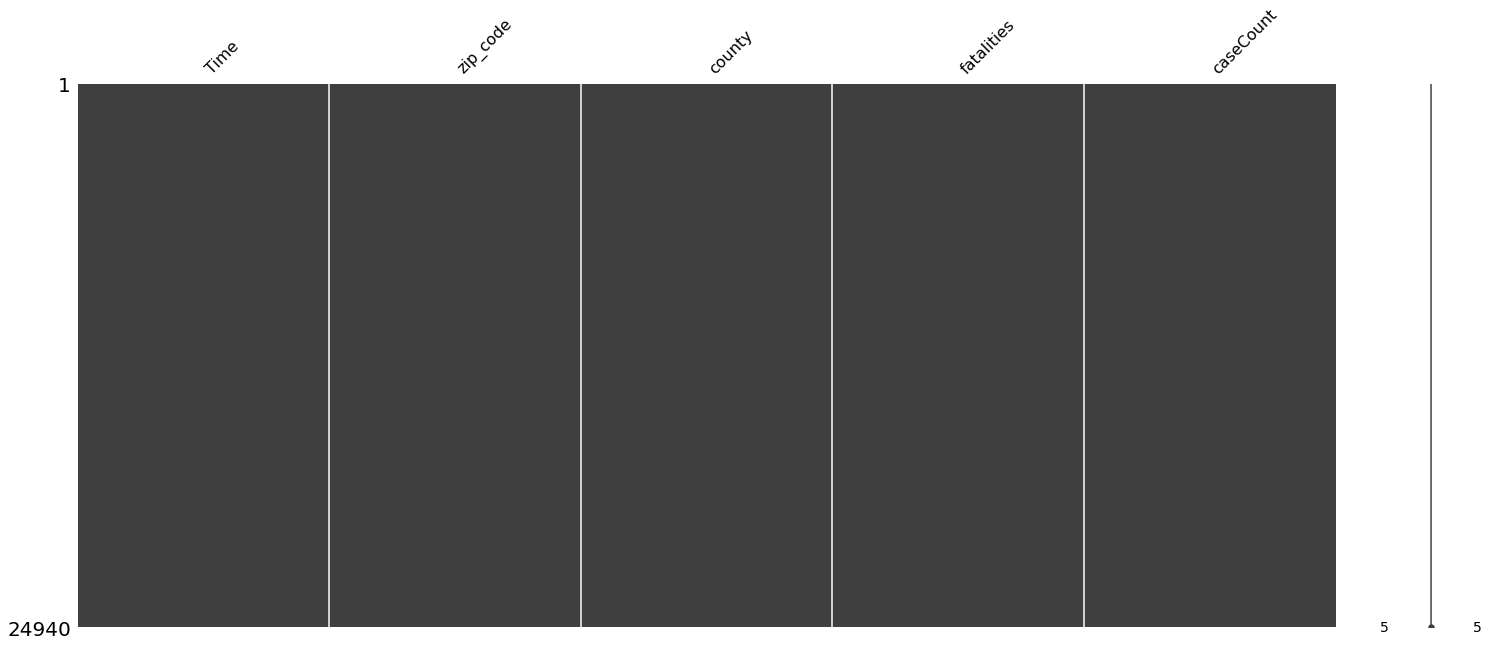

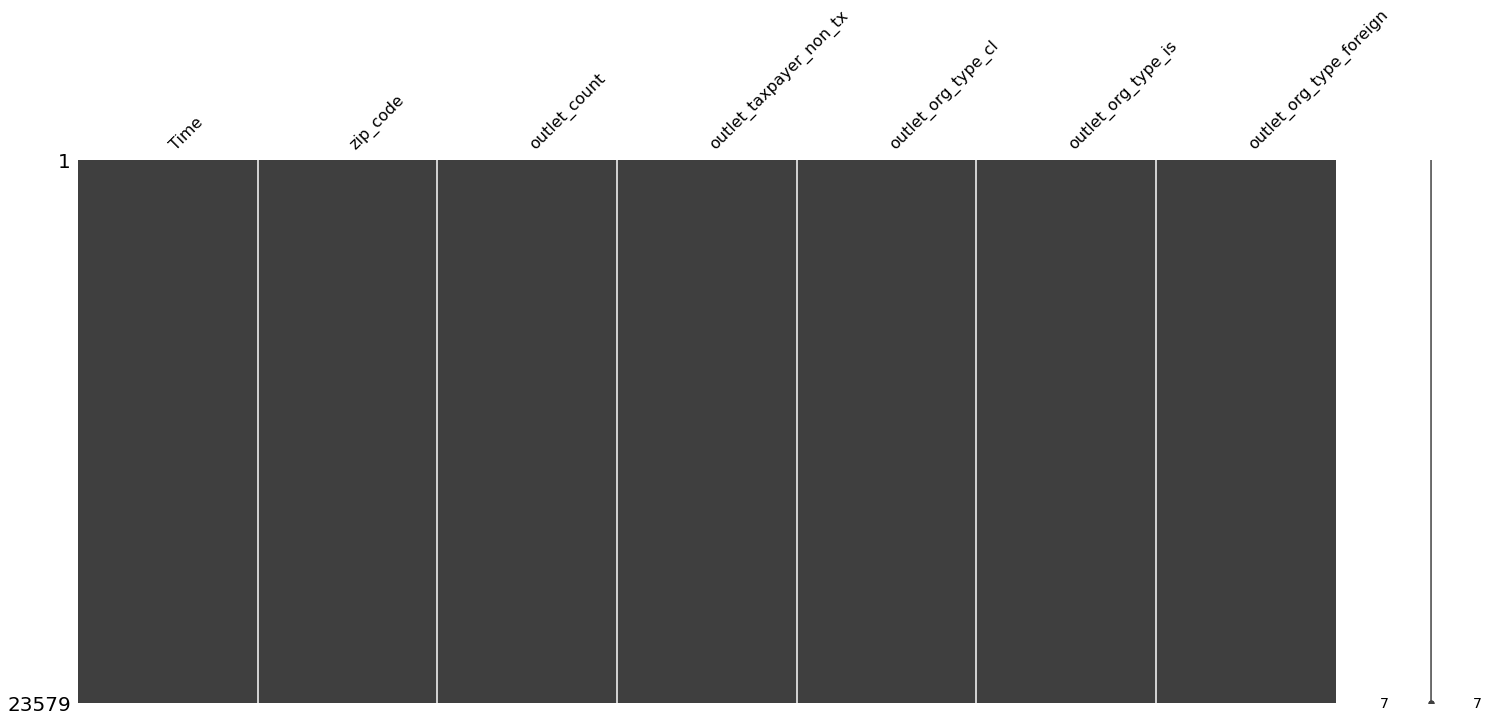

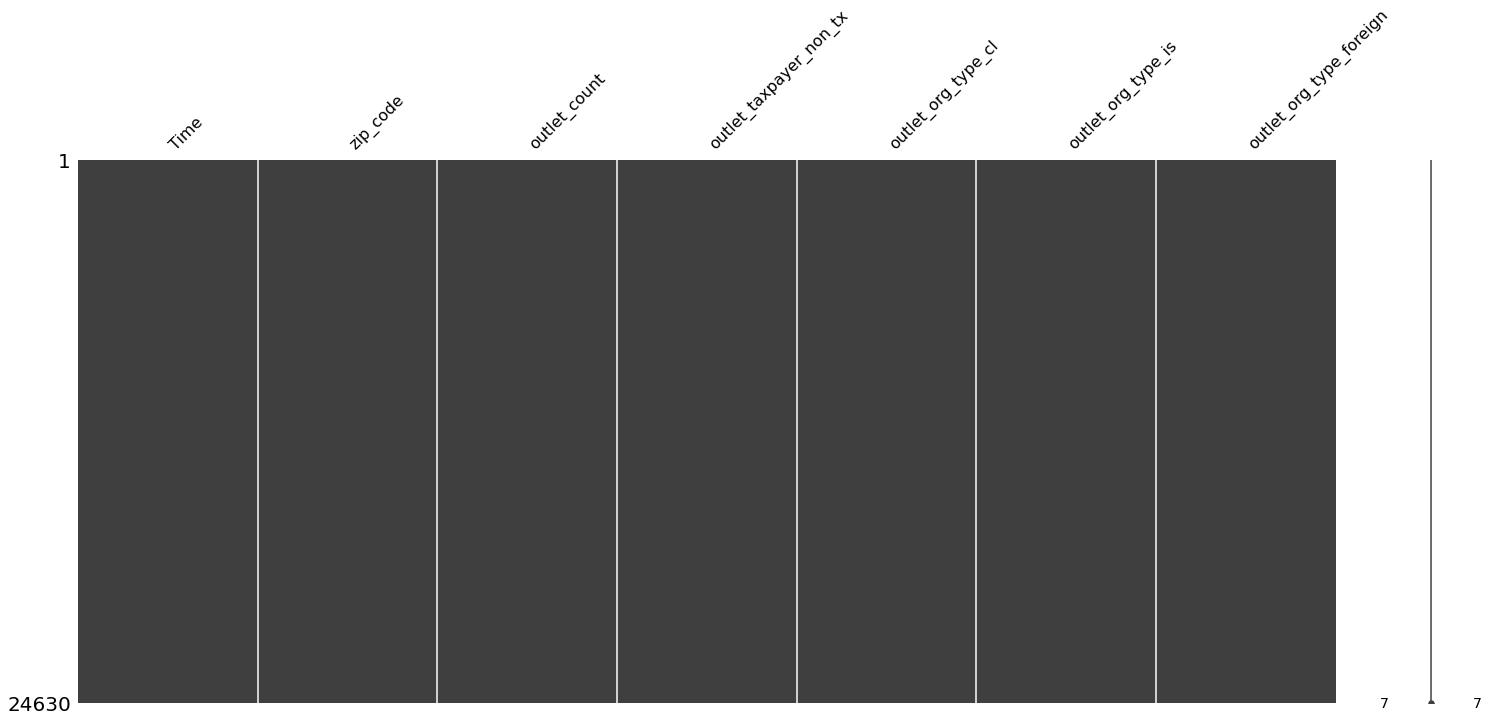

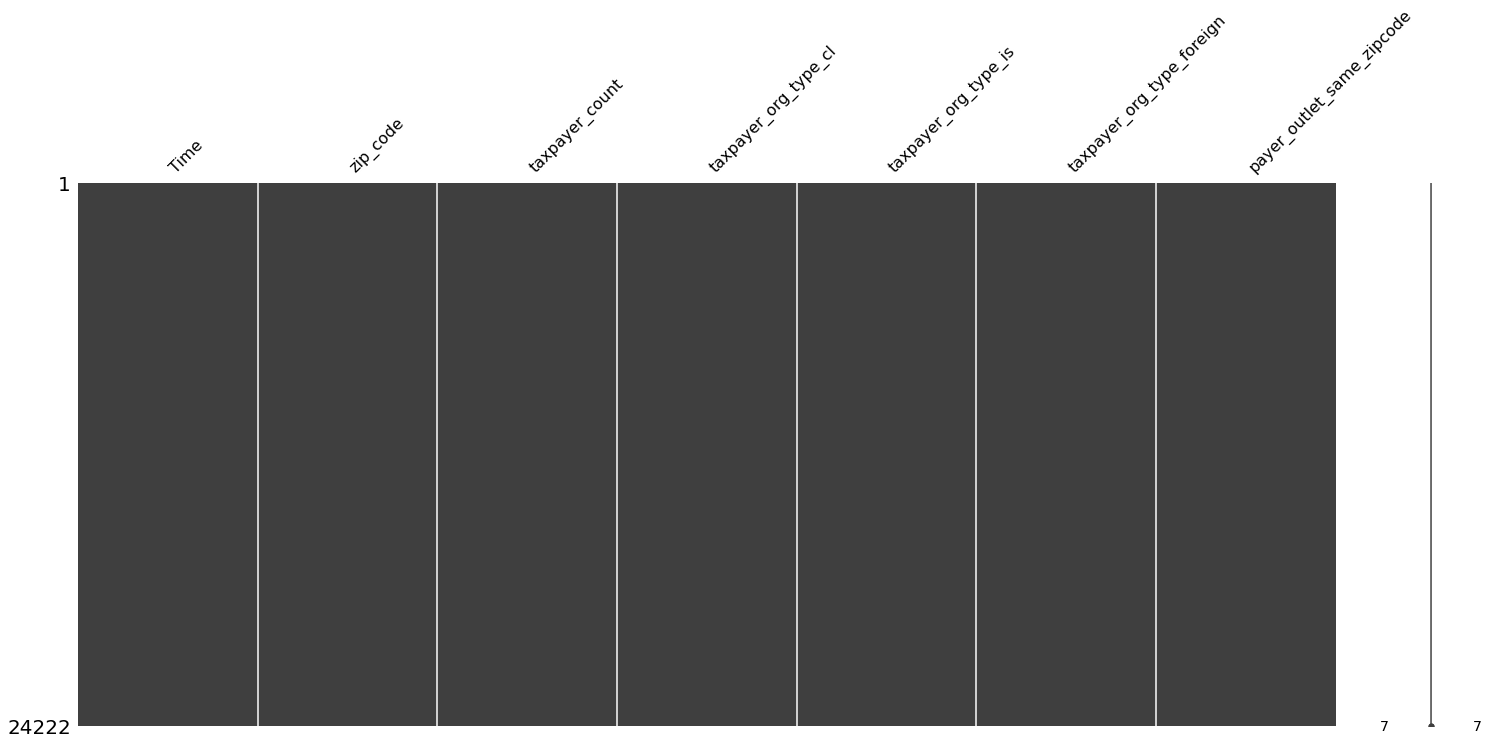

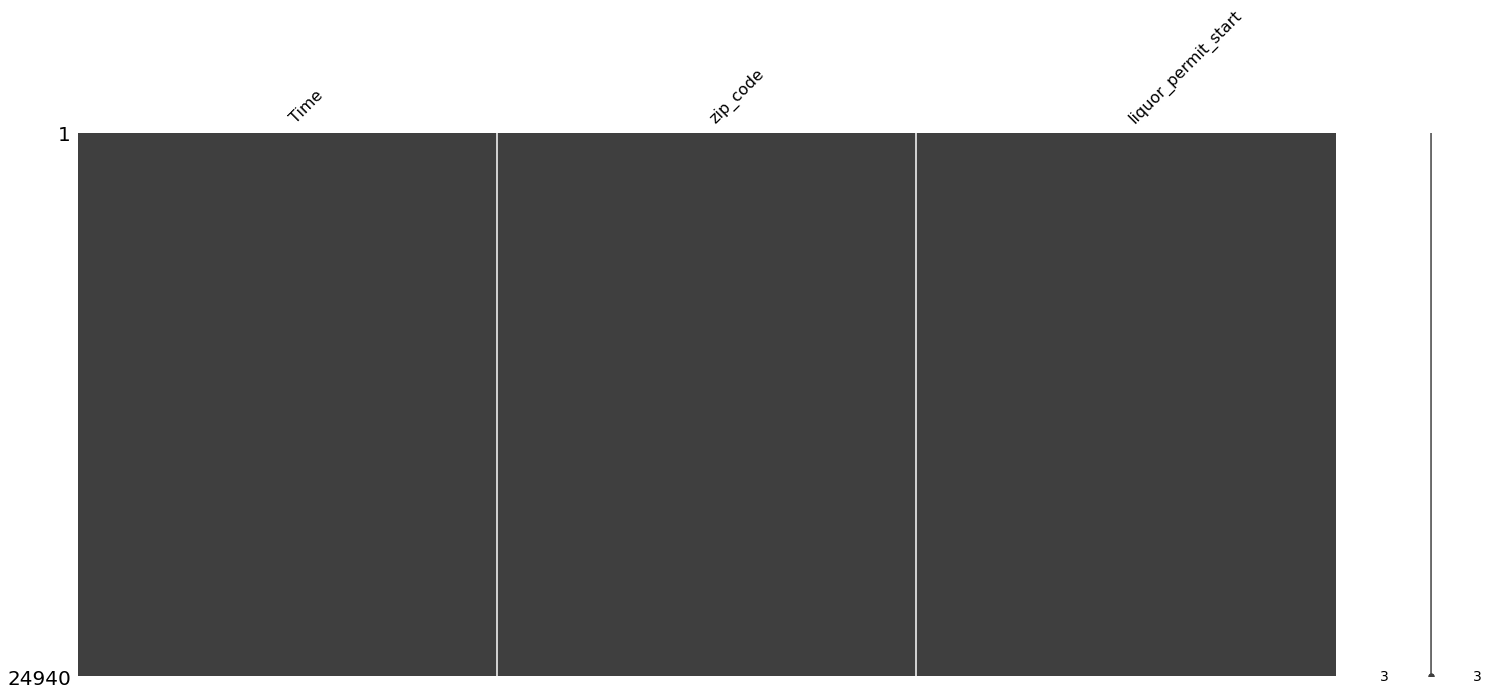

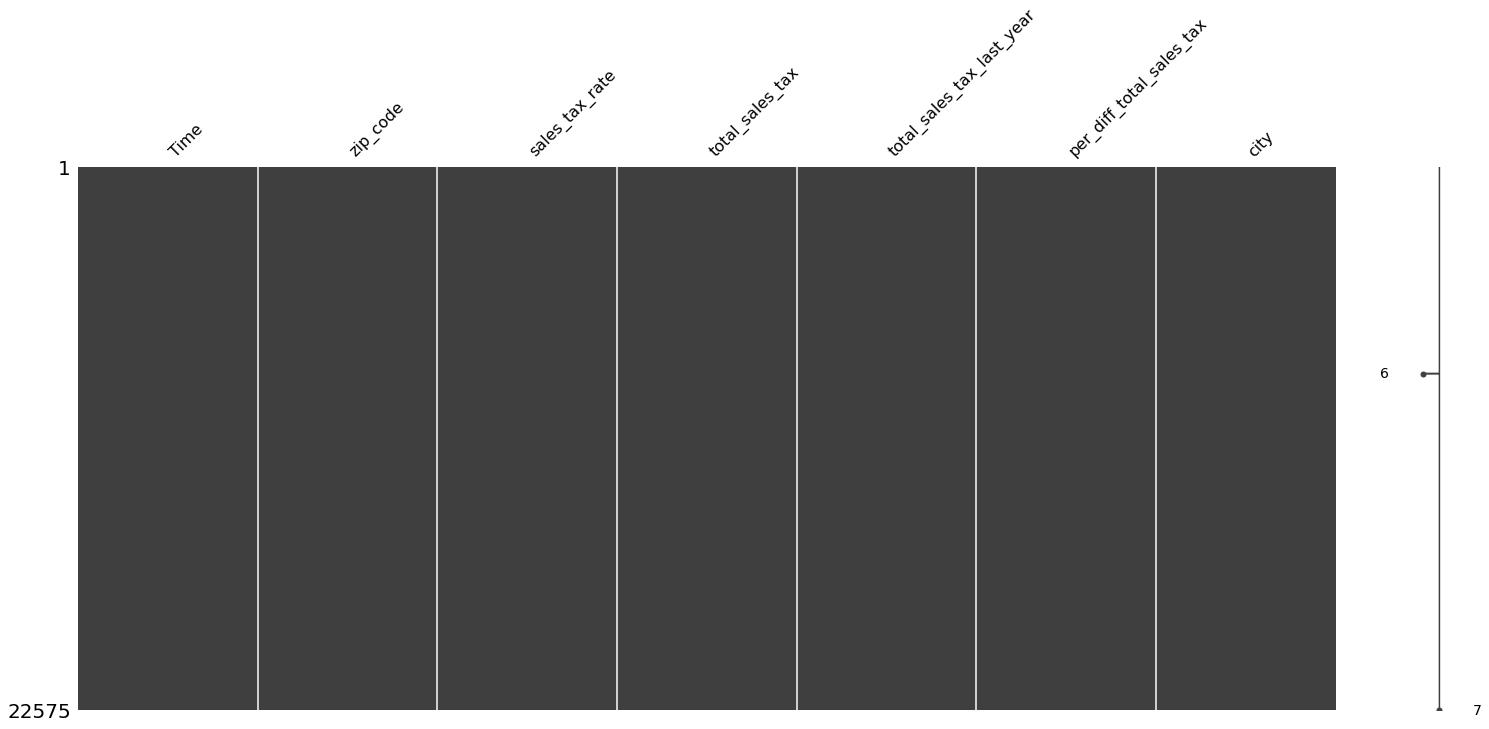

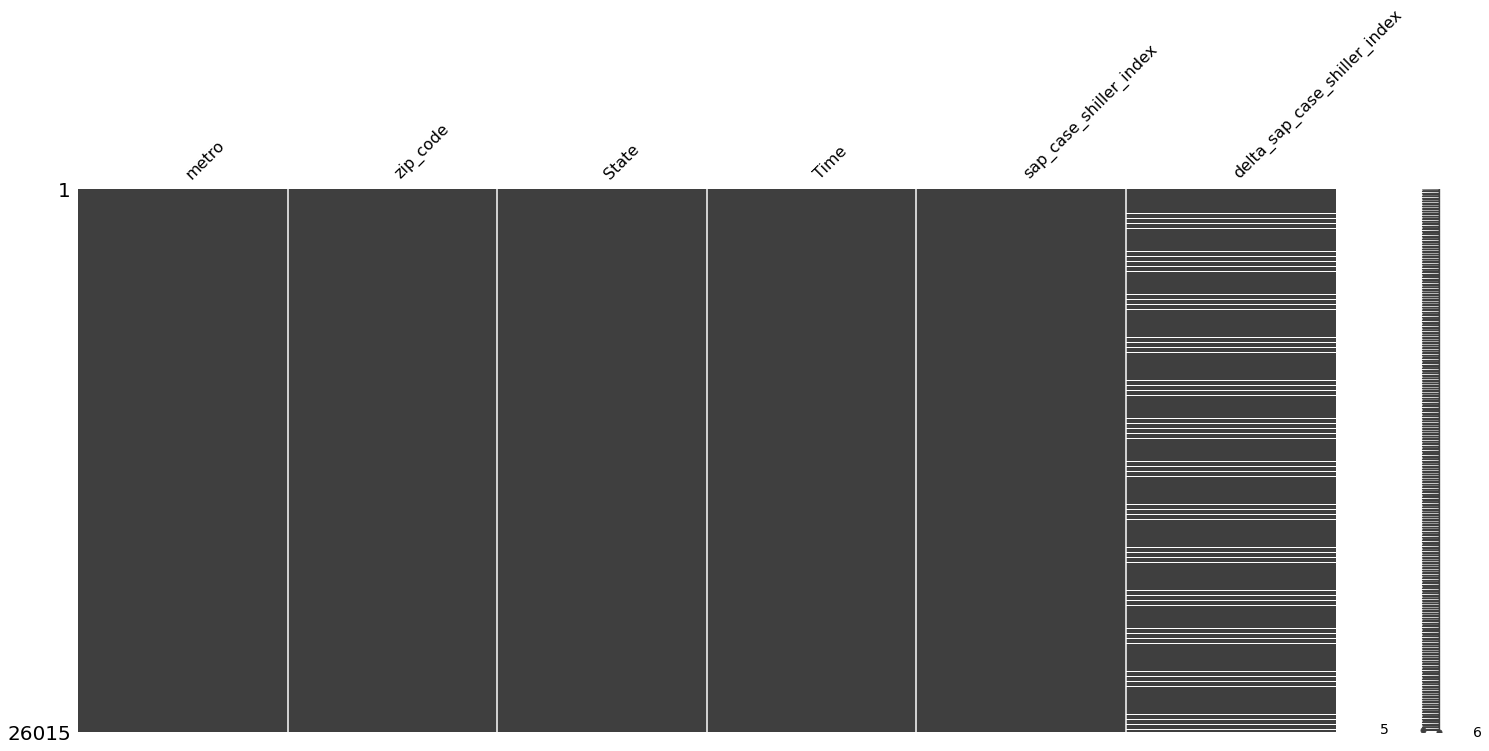

In [8]:
for frame in feature_frames:
    msno.matrix(frame)
    

In [9]:
# lag_ = {12:['zori_ssa']}

### Create one master main-frame, no lag

In [10]:
# main_frame = helper.time_lag_merge(main_frame, main_frame, lag_)
main_frame = helper.time_lag_merge(main_frame, weather)
main_frame = helper.time_lag_merge(main_frame, env_viol)
main_frame = helper.time_lag_merge(main_frame, daycare)
main_frame = helper.time_lag_merge(main_frame, econ)
main_frame = helper.time_lag_merge(main_frame, city_unemp)
main_frame = helper.time_lag_merge(main_frame, gas_prices)
main_frame = helper.time_lag_merge(main_frame, monthly_tnx)
main_frame = helper.time_lag_merge(main_frame, polling)
main_frame = helper.time_lag_merge(main_frame, covid)
main_frame = helper.time_lag_merge(main_frame, new_biz_ins)
main_frame = helper.time_lag_merge(main_frame, new_biz_out)
main_frame = helper.time_lag_merge(main_frame, new_biz_tax)
main_frame = helper.time_lag_merge(main_frame, liquor)
main_frame = helper.time_lag_merge(main_frame, sales_tax)
main_frame = helper.time_lag_merge(main_frame, sap)

### Check missing values on large frame

<AxesSubplot:>

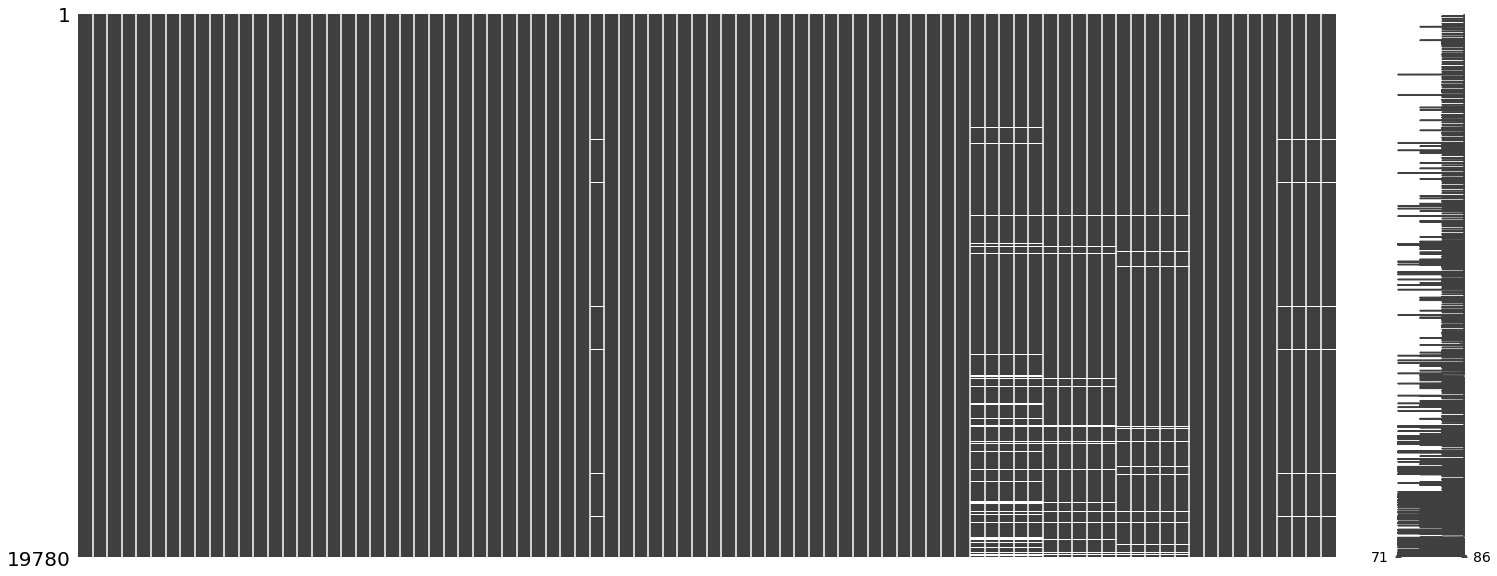

In [11]:
msno.matrix(main_frame)

In [12]:
# # Check missing values rows 
# missing_vals = main_frame[main_frame['tx_is_a_lot_better'].isna()]

In [13]:
main_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19780 entries, 0 to 19779
Data columns (total 86 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Time                                    19780 non-null  datetime64[ns]
 1   zip_code                                19780 non-null  int64         
 2   zori_ssa                                19780 non-null  float64       
 3   mintempC                                19780 non-null  float64       
 4   maxtempC                                19780 non-null  float64       
 5   precipMM                                19780 non-null  float64       
 6   env_violation_count                     19780 non-null  float64       
 7   num_daycare_permit                      19780 non-null  float64       
 8   daycare_childcare_subsidies_ratio       19780 non-null  float64       
 9   daycare_corrective_action_ratio         19780 non-

In [14]:
## Fill with zeros (change this later)
main_frame = main_frame.fillna(0)
main_frame = main_frame.drop(columns=['metro_right', 'State_right'])

# Check columns and missing values
# main_frame.info()

In [27]:
# # Save csv
# main_frame.to_csv('all_vars.csv')